# Discriminant Correspondence Analysis (DISCA)

In [1]:
# Chargement de la base
import numpy as np 
import pandas as pd
import plotnine as pn

D = pd.read_excel("./data/Data_Illustration_Livre_ADL.xlsx",sheet_name="DIVAY",header=0)
D

,Region,Woody,Fruity,Sweet,Alcohol,Hedonic
0,Loire,A,C,B,A,A
1,Loire,B,C,C,B,C
2,Loire,A,B,B,A,B
3,Loire,A,C,C,B,D
4,Rhone,A,B,A,C,C
5,Rhone,B,A,A,C,B
6,Rhone,C,B,B,B,A
7,Rhone,B,C,C,C,D
8,Beaujolais,C,A,C,A,A
9,Beaujolais,B,A,C,A,B


In [2]:
from scientisttools.discriminant_analysis import DISCA

In [3]:
disca = DISCA(n_components=None,
              target=["Region"],
              features_labels=list(D.columns[1:]),
              matrix_type="completed",
              priors=None)

disca.fit(D)

DISCA(features_labels=['Woody', 'Fruity', 'Sweet', 'Alcohol', 'Hedonic'],
      target=['Region'])

In [4]:
disca.statistics_test_["cramer's V"]

,value
Woody,0.620174
Fruity,0.620174
Sweet,0.441170
Alcohol,0.660772
Hedonic,0.000000


In [5]:
# Individus supplémentaires
Xsup = pd.DataFrame({
    "Woody" : "A","Fruity" : "C", "Sweet" : "B", "Alcohol" : "B", "Hedonic" : "A"
},index=[13])
Xsup

,Woody,Fruity,Sweet,Alcohol,Hedonic
13,A,C,B,B,A


In [6]:
yTrain = D["Region"]
XTrain = D.drop(columns=["Region"])
XTrain

,Woody,Fruity,Sweet,Alcohol,Hedonic
0,A,C,B,A,A
1,B,C,C,B,C
2,A,B,B,A,B
3,A,C,C,B,D
4,A,B,A,C,C
5,B,A,A,C,B
6,C,B,B,B,A
7,B,C,C,C,D
8,C,A,C,A,A
9,B,A,C,A,B


In [7]:
disca.transform(Xsup)

,Dim.1,Dim.2
13,1.006603,-0.153958


In [8]:
disca.decision_function(Xsup)

,Beaujolais,Loire,Rhone
13,2.501952,0.126952,1.841952


In [9]:
disca.predict_proba(Xsup)

,Beaujolais,Loire,Rhone
13,0.176372,0.578301,0.245327


In [10]:
disca.predict(Xsup)

,predict
13,Loire


In [11]:
disca.score(XTrain,yTrain)

0.9166666666666666

In [12]:
disca.score(XTrain,disca.predict(XTrain))

1.0

# Approche 2  - Dummies variables

In [13]:
dummies = pd.get_dummies(XTrain,prefix_sep="_")
D2 = pd.concat([yTrain,dummies],axis=1)
D2

,Region,Woody_A,Woody_B,Woody_C,Fruity_A,Fruity_B,Fruity_C,Sweet_A,Sweet_B,Sweet_C,Alcohol_A,Alcohol_B,Alcohol_C,Hedonic_A,Hedonic_B,Hedonic_C,Hedonic_D
0,Loire,1,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0
1,Loire,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0
2,Loire,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0
3,Loire,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1
4,Rhone,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0
5,Rhone,0,1,0,1,0,0,1,0,0,0,0,1,0,1,0,0
6,Rhone,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0
7,Rhone,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1
8,Beaujolais,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,0
9,Beaujolais,0,1,0,1,0,0,0,0,1,1,0,0,0,1,0,0


In [14]:
disca2 = DISCA(n_components=None,
               target=["Region"],
               features_labels=None,
               mod_labels=list[dummies.columns],
               matrix_type="dummies",
               priors=None)

disca2.fit(D2)

DISCA(matrix_type='dummies',
      mod_labels=list[Index(['Woody_A', 'Woody_B', 'Woody_C', 'Fruity_A', 'Fruity_B', 'Fruity_C',
       'Sweet_A', 'Sweet_B', 'Sweet_C', 'Alcohol_A', 'Alcohol_B', 'Alcohol_C',
       'Hedonic_A', 'Hedonic_B', 'Hedonic_C', 'Hedonic_D'],
      dtype='object')],
      target=['Region'])

In [15]:
disca2.coef_

,Dim.1,Dim.2
Woody_A,0.372383,-0.018762
Woody_B,-0.020371,0.155890
Woody_C,-0.352012,-0.137128
Fruity_A,-0.352012,-0.137128
Fruity_B,-0.020371,0.155890
Fruity_C,0.372383,-0.018762
Sweet_A,-0.201720,0.285476
Sweet_B,0.130918,-0.058217
Sweet_C,0.016297,-0.124712
Alcohol_A,-0.055843,-0.327562


In [16]:
disca2.row_coord_

,Dim.1,Dim.2
0,0.819841,-0.423303
1,0.499227,-0.045801
2,0.427087,-0.248651
3,0.891982,-0.220453
4,0.068806,1.046165
5,-0.655588,0.927798
6,-0.110547,-0.097673
7,0.286823,0.635976
8,-0.743569,-0.726531
9,-0.411929,-0.433513


In [17]:
disca2.statistics_test_["cramer's V"]

,value
Woody,0.620174
Fruity,0.620174
Sweet,0.441170
Alcohol,0.660772
Hedonic,0.000000


In [18]:
ca = disca.ca_model_

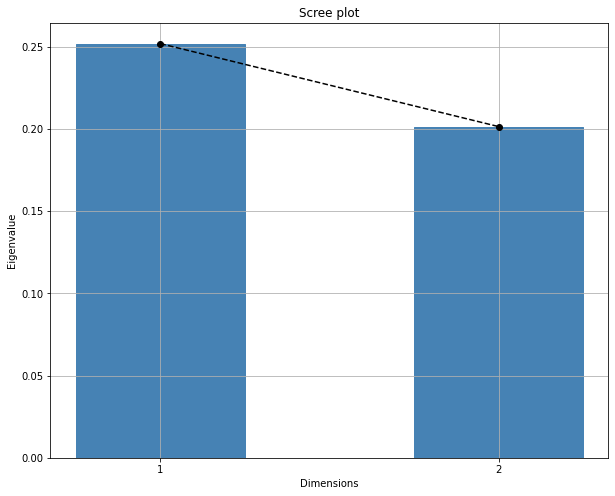

In [19]:
from scientisttools.pyplot import plot_eigenvalues
import matplotlib.pyplot as plt

fig, axe =plt.subplots(figsize=(10,8))
plot_eigenvalues(ca,choice="eigenvalue",ax=axe)
plt.show()